In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [83]:
# Dataset original
df = pd.read_csv('data\esets_lung_exprs_genes.txt',sep="\t",header=None,index_col=0)

In [84]:
# Preparación de Data - Pablo
df2=df.transpose()
df2.columns=df2.columns.fillna('sample_name')
df2['sample_name']=df2['sample_name'].str[:9]
df3=pd.read_csv('data\E-MTAB-6699.sdrf.txt', sep="\t",header=0,index_col=False)
df4=df3.drop(['Extract Name','Factor Value[disease]'],axis=1)
df5=df3.drop(df4,axis=1)
df5['Tumor']=np.where(df5['Factor Value[disease]']=='tumor',1 ,0)
df6=df5.drop(['Factor Value[disease]'],axis=1)
null_columns4=df2.columns[df2.isna().any()]
df2[null_columns4].isna().sum()
df7=df2.merge(df6,how='inner',left_on='sample_name',right_on='Extract Name',left_index=True)
df7.set_index(df7['sample_name'],inplace=True)
df7=df7.drop(['sample_name','Extract Name'],axis=1)
df_caract=df7.drop('Tumor',axis=1)
df_result=df7.drop(df_caract,axis=1)


In [85]:
# Se junta las caracteristicas con el target
dataset = pd.concat([df_caract, df_result], axis=1, sort=False)

In [86]:
dataset.sample(10)

,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRA,...,CCDC63,C16orf52,LOC101929475,LOC389641,LOC400499,GALR3,NUS1P3,TMEM231,LOC100505915,Tumor
sample_name,,,,,,,,,,,,,,,,,,,,,
GSM475770,6.7280180474803,7.48841995402248,7.77630072697348,5.89385580070634,6.39363330461782,6.06063375024237,6.67811381822516,5.33369260788808,7.84605591352432,8.13780853503939,...,4.91554,3.62438,4.35067,5.35736,6.2268,6.49372,3.77186,5.96545,5.23756,1
GSM318121,7.66869832738631,8.27167210087508,7.58269252147026,5.33709780535457,6.28866788371302,7.24005790559874,8.34278638304241,4.39737661559608,8.28901169479499,7.34884903334131,...,4.64682,3.57661,3.9408,5.06341,5.90604,5.70265,4.01983,6.41594,5.4185,1
GSM773550,8.12616705958644,7.74708253744207,7.40350968894167,5.4971924713988,6.71588876113445,6.59432617257244,6.8728961649409,4.58021687099884,8.68370635730192,7.85053954728567,...,5.08112,4.49831,4.20927,4.94039,6.47339,6.25298,4.06776,6.61327,4.89534,1
GSM773760,7.66674629538423,7.54196355603892,7.64097600109524,5.77550206086997,7.2799083450108,6.62164825918507,9.16259981591191,5.23579182463082,7.92310138444072,7.37245549361444,...,4.83531,3.45986,4.51582,4.60038,6.15944,5.40411,3.73865,5.48817,5.63406,1
GSM748283,7.77571830746289,8.01577060804185,7.95383564621354,5.74194436468927,6.60585368786714,6.49925728572694,9.28962715739883,4.74440823913591,8.11885910508339,7.85174566015926,...,4.8488,3.84321,4.58965,4.86561,5.77841,6.26458,4.62721,5.67274,4.90644,1
GSM494566,7.65277223494819,7.81113324169889,7.3795943440216,5.4554409523857,6.9965368777712,6.68425202706862,9.47602755706686,5.12779691881224,7.51626635073946,7.54220945929497,...,4.38344,3.64714,4.20357,4.65128,6.09576,5.83729,4.62516,5.68025,6.24279,1
GSM475669,7.50522907005343,6.84953819717234,7.45181770535708,5.43014110843769,6.78745121361182,7.71732487091326,8.48050543841173,4.51523875830608,7.22387019458546,7.73301948735161,...,4.48586,3.75322,4.39053,4.80119,5.89566,6.02609,4.61664,5.81731,5.19529,0
GSM494645,7.99552441080449,9.137089720926,7.55646859130625,5.68691090062481,6.92794999357585,8.15589744758025,8.32550817008394,4.93597012280096,7.07067817783732,7.37644407615366,...,4.7806,3.65597,4.131,4.81083,5.96588,5.95801,4.42141,6.67621,5.08693,1
GSM748203,8.76516040401987,8.31808991689983,7.1808155104317,5.78637493494612,6.74186804900212,6.86413476050293,8.05536862721164,4.49744895746166,7.07432829840034,7.51947927486739,...,4.81351,4.85444,4.46281,4.85074,5.83322,5.89211,5.33233,6.95317,5.72749,1


In [87]:
dataset.groupby('Tumor').agg('size')

Tumor
0     147
1    1086
dtype: int64

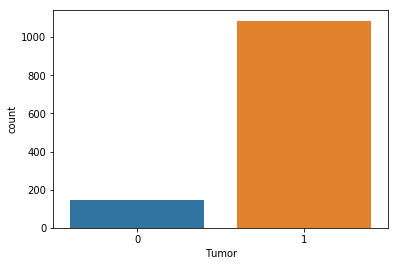

In [88]:
# Data claramente desbalanceada
%matplotlib inline
sns.countplot(x='Tumor', data=dataset)

## Undersampling


In [89]:
# Undersampling

# variable target = t
t = dataset[['Tumor']]
n_samples = t.shape[0]
n_samples_1 = (t == 1).sum()
n_samples_0 = (t == 0).sum()

## Si se quiere que la clase minoritaria sea el 50% del total
## formula para hallar la cantidad de registros a seleccionar (de la clase mayoritaria) para el undersampling
n_samples_1_new =  n_samples_0 / 0.50 - n_samples_0
n_samples_1_new_per = n_samples_1_new / n_samples_1

dataset_undersampled = pd.concat( 
    [dataset.loc[dataset['Tumor']!=0].sample(frac=n_samples_Y_new_per, replace=False , random_state = 10) , 
     dataset.loc[dataset['Tumor']==0] ])

# reseteamos indices ----
dataset_undersampled.reset_index(drop=True, inplace=True)

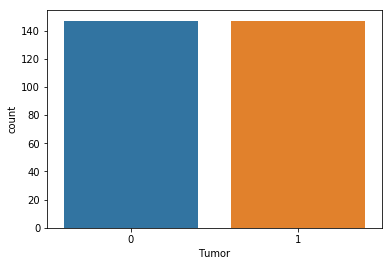

In [90]:
sns.countplot(x='Tumor', data=dataset_undersampled)

## OVERSAMPLING
### SMOTE

In [91]:
dataset.groupby('Tumor').agg('size')

Tumor
0     147
1    1086
dtype: int64

In [92]:
n_samples_1_new_per = n_samples_1_new / n_samples_1
print(n_samples_1_new_per)

Tumor    0.135359
dtype: float64


In [93]:
# Undersampling

# variable target = t
t = dataset[['Tumor']]
n_samples = t.shape[0]
n_samples_1 = (t == 1).sum()
n_samples_0 = (t == 0).sum()
n_samples_0_new = 0.50 * n_samples_1 / 0.5 - n_samples_0

In [94]:
# funcion para seleccionar un row aleatorio de un dataframe
def random_row_df(df):
    index_random = random.choice(range(len(df)))
    i = 0
    for index,row in df.iterrows():
        if i==index_random:
            d = {}
            indexs = row.index.tolist()
            values = row.values.tolist()
            for j in range(len(indexs)):
                d[indexs[j]] = [values[j]]
            df_row = pd.DataFrame(d)
            break
        i = i + 1
    return df_row

In [95]:
# seleccionando los puntos base para nueva data de SMOTE
sel_ = dataset.loc[dataset['Tumor'] == 0].iloc[: , :-1].sample(n = int(n_samples_0_new) , replace = True , random_state = 10)

In [98]:
sel_flt= sel_.astype(float)

In [99]:
sel_flt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, GSM466961 to GSM467015
Columns: 20545 entries, RFC2 to LOC100505915
dtypes: float64(20545)
memory usage: 147.2+ MB


In [ ]:
# randoms para generacion de nueva data 
steps = np.random.uniform(size = int(n_samples_0_new[0]))

# generacion de nueva data (rows) con SMOTE
i=0
df_news = None
for index , row in sel_flt.iterrows():
    d = {}
    indexs = row.index.tolist()
    values = row.values.tolist()
    for j in range(len(indexs)):
        d[indexs[j]] = [values [j]]
    df_initial = pd.DataFrame(d)
    
    step = steps[i]
    
    #SMOTE
    # df_new ES EL PUNTO SINTETICO Y TOMADO COMO MUESTRA DE 
    # LA CLASE MINORITARIA (0)
    df_new = df_initial - step * (df_initial - random_row_df(sel_flt))
    
    #se concatena todos nuevos rows generados del SMOTE
    df_news = pd.concat([df_news , df_new])
    i = i +1 


In [76]:
df_news['Tumor'] = 0
dataset_smoted = pd.concat([dataset , df_news])

# reseto de indices
#dataset_smoted.reset_index(drop = True , inplace = True)


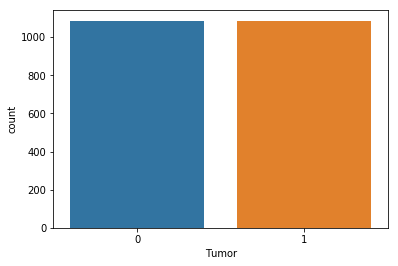

In [77]:
sns.countplot(x='Tumor', data=dataset_smoted)

In [79]:
dataset_smoted.groupby('Tumor').agg('size')

Tumor
0    1086
1    1086
dtype: int64

In [81]:
dataset_smoted.to_csv('Data\dataset_smoted.csv',header=True,index=True)